<a href="https://colab.research.google.com/github/Nilaadri/Projects/blob/main/NYC_Airbnb_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Airbnb Exploratory Data Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Niladri Dhar

# **GitHub Link -**

https://github.com/Nilaadri/Projects.git

# **We will try to find how does the availability and popularity of different types of Airbnb listings vary across the neighborhoods of New York City.**


## ***1. Preparing the Dataset for Analyzing***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset Rows & Columns count

In [ ]:
#Number of Columns
print("The Number of Columns =",len(df.columns))

The Number of Columns = 16


In [ ]:
#Number of Rows
print("The Number of Rows =",len(df.index))

The Number of Rows = 48895


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    48895
dtype: int64

This shows that all the Rows are unique, because the number of 'False' match, matches to the number of total rows.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

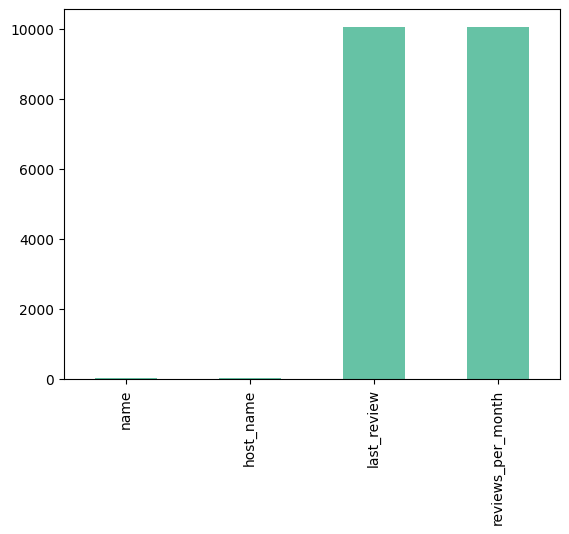

In [ ]:
# Visualizing the missing values
df.isnull().sum()[df.isna().sum()>0].plot(kind='bar',colormap='Set2')

### Dealing with the mising values

In [ ]:
#Filling in the missing values with Zero because the vaue is directly related to the number of Reviews which is Zero for the repected rows. 
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
#Dropping all the Rows containg the missing value for the respected coulmns. 
df.dropna(subset=['name','host_name'], axis=0, inplace=True) 

In [ ]:
#Checking the number of missing value in the final cleaned datasest.
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###Dealing with Outliers using using IQR Method

<Axes: xlabel='price'>

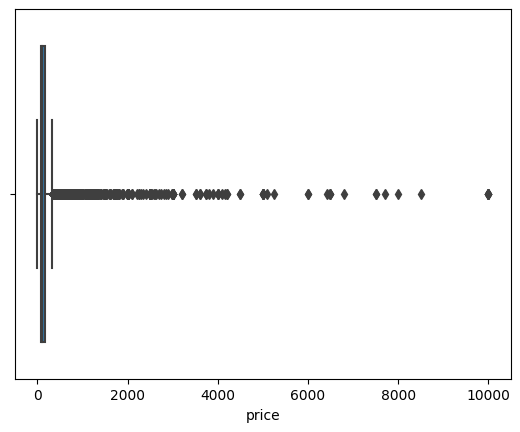

In [ ]:
sns.boxplot(x="price", data=df)

The outliers are points you see on either sides of the whiskers.

In [ ]:
df = df[(df['price'] >= df['price'].quantile(0.05)) &
        (df['price'] <= df['price'].quantile(0.95))]

The df dataframe is filtered to remove observations whose price is below the 5th percentile or above the 95th percentile of all price values in the dataset. This means that values that are considered as extreme or unusual are removed from the dataset.

### What did you know about your dataset?

The Airbnb NYC 2019 dataset provides a comprehensive overview of the listing activity and metrics for Airbnb rentals in New York City during the year 2019. With a total of 48,895 rows and 16 columns, this dataset contains essential information that allows for a deeper understanding of hosts, pricing patterns, geographical availability, and other crucial factors needed to make predictions and draw meaningful conclusions about the Airbnb market in NYC.

Each row in the dataset represents a unique listing on Airbnb, while the columns provide various attributes and measurements related to these listings.

By utilizing this dataset, researchers and analysts can gain a comprehensive understanding of the Airbnb market in New York City during 2019. The variables provide valuable information on hosts, pricing dynamics, geographical distribution, availability patterns, and guest feedback, enabling various analyses, predictions, and insights that can contribute to decision-making processes and draw conclusions about the Airbnb ecosystem in NYC.

## ***2. Understanding The Variables***

In [ ]:
# Dataset Columns
print(list(df.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.437800e+04,4.437800e+04,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000,44378.000000
mean,1.878173e+07,6.529035e+07,40.729191,-73.952175,126.722903,6.850624,24.098202,1.109043,6.696088,109.328000
std,1.095775e+07,7.736249e+07,0.054347,0.045549,70.917447,20.024665,45.498807,1.610966,31.665854,130.075351
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.292819e+06,7.461100e+06,40.690180,-73.982638,70.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.936193e+07,2.910057e+07,40.722810,-73.955400,105.000000,2.000000,6.000000,0.390000,1.000000,40.000000
75%,2.881727e+07,1.028339e+08,40.763560,-73.936993,165.000000,5.000000,25.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,355.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Here is the summary of the variables in the dataset:

1. id: 
   - Description: This variable represents a unique identifier for each listing in the dataset.
   - Data Type: Numeric

2. name:
   - Description: This variable represents the title or name of the listing.
   - Data Type: Categorical

3. host_id: 
   - Description: This variable represents the unique identifier of the host for each listing.
   - Data Type: Numeric

4. host_name: 
   - Description: This variable represents the name of the host for each listing.
   - Data Type: Categorical

5. neighbourhood_group: 
   - Description: This variable represents the group of neighborhoods that contain the listing.
   - Data Type: Categorical

6. neighbourhood: 
   - Description: This variable represents the specific neighborhood that contains the listing.
   - Data Type: Categorical

7. latitude:
   - Description: This variable represents the latitude coordinate of the listing's location.
   - Data Type: Numeric

8. longitude: 
   - Description: This variable represents the longitude coordinate of the listing's location.
   - Data Type: Numeric

9. room_type: 
   - Description: This variable represents the type of property being offered, such as entire home/apartment, private room, or shared room.
   - Data Type: Categorical

10. price:
    - Description: This variable represents the price per night for the listing in US dollars.
    - Data Type: Numeric

11. minimum_nights: 
    - Description: This variable represents the minimum number of nights required to book the listing.
    - Data Type: Numeric

12. number_of_reviews: 
    - Description: This variable represents the total number of reviews that the listing has received.
    - Data Type: Numeric

13. last_review: 
    - Description: This variable represents the date of the last review for the listing.
    - Data Type: Date

14. reviews_per_month: 
    - Description: This variable represents the average number of reviews per month for the listing.
    - Data Type: Numeric

15. calculated_host_listings_count: 
    - Description: This variable represents the number of listings that a host has in total.
    - Data Type: Numeric

16. availability_365: 

    - Description: This variable represents the number of days in a year that the listing is available for booking.
    - Data Type: Numeric

### Checking Unique Values for each variable.

In [ ]:
#Unique Values for 'neighbourhood_group'

list(df.neighbourhood_group.unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
#Unique Values for 'room_type'

list(df.room_type.unique())

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#Unique Values for 'host_id'.

df.host_id.value_counts()

219517861    272
107434423    195
30283594      98
12243051      95
61391963      91
            ... 
5059784        1
68309691       1
1520629        1
26225727       1
68119814       1
Name: host_id, Length: 34726, dtype: int64

In [ ]:
#Plotting the Top 10 hosts.

th=df.host_id.value_counts().head(10)
th=th.to_frame()
th.reset_index(inplace=True)
th.rename(columns={'index':'Host ID', 'host_id':'Count'}, inplace=True)

[Text(0.5, 1.0, 'Top 10 Host IDs')]

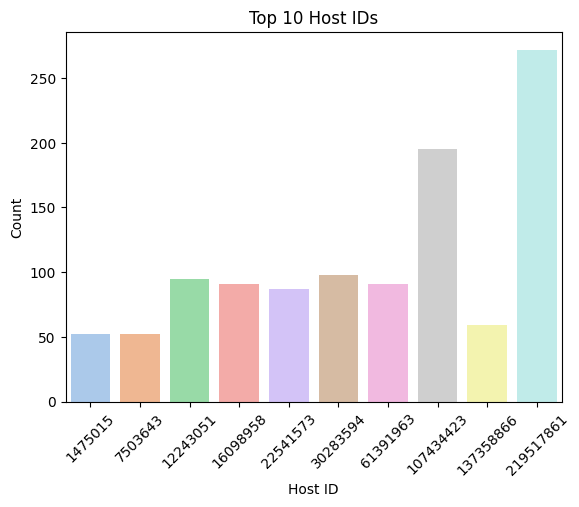

In [ ]:
az=sns.barplot(x="Host ID", y="Count", data=th,palette='pastel')
plt.xticks(rotation=45)
az.set(title='Top 10 Host IDs')

A diverse distribution among the top 10 hosts is also noteworthy. It indicates that there are multiple players in the market, each with a considerable number of listings. This competition can be beneficial for customers, as it provides them with a variety of options to choose from, potentially leading to competitive pricing and improved service quality.

## 3. **Data Wrangling and performing Analysis and Plotting them.**

***Now that we have seen the data that we are working with, let's visualize our data in order to get a better understanding of it.***


#### *Map of Neighbourhood group*

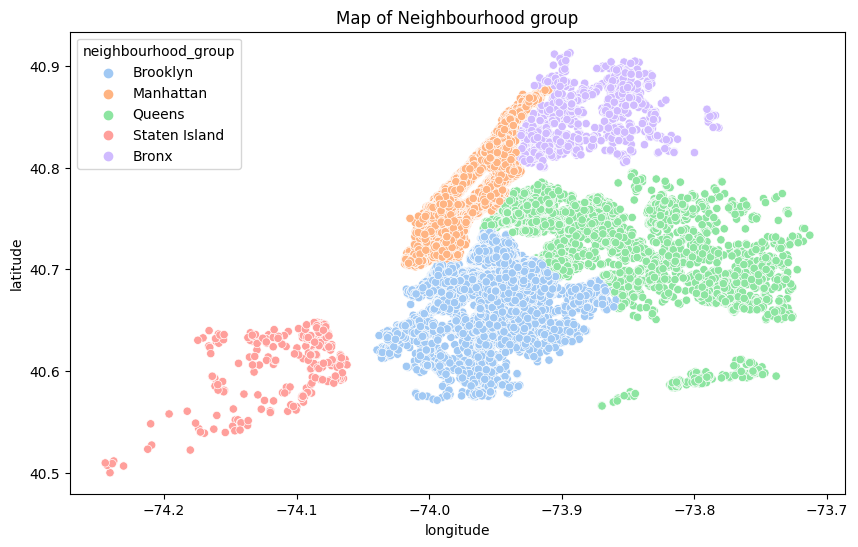

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette='pastel')
ax.set(title='Map of Neighbourhood group')
plt.show()

#### *First we'll look at the neighbourhood groups, and where Airbnbs are most commonly found.*

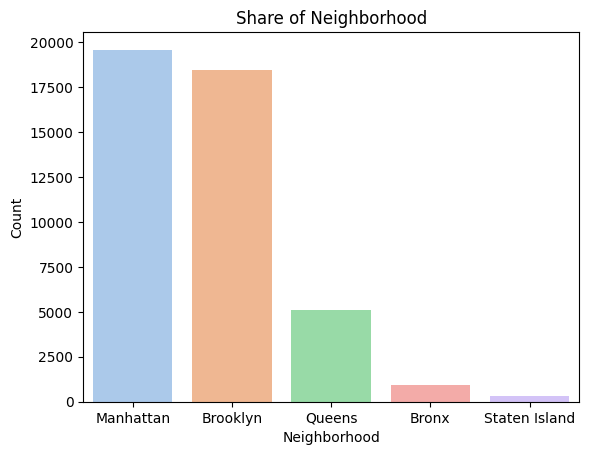

In [ ]:
ax1 = sns.barplot(x=df['neighbourhood_group'].value_counts().index,y=df['neighbourhood_group'].value_counts(),palette='pastel')
ax1.set(xlabel='Neighborhood', ylabel='Count', title='Share of Neighborhood')
plt.show()


According to the Airbnb 2019 NYC dataset, Manhattan and Brooklyn indeed have the highest number of listings compared to other neighborhoods in New York City. This phenomenon can be attributed to various factors, including the presence of numerous tourist attractions in both boroughs.

Manhattan, often referred to as the heart of New York City, boasts iconic landmarks such as Times Square, Central Park, the Empire State Building, and Broadway theaters. These attractions attract millions of tourists every year, creating a high demand for accommodation options in the area. 

Brooklyn, on the other hand, has become an increasingly popular destination for travelers seeking a more authentic and diverse New York City experience. The borough offers a rich cultural scene, with neighborhoods like Williamsburg, DUMBO, and Brooklyn Heights known for their unique charm, art galleries, trendy shops, and vibrant culinary offerings. Additionally, Brooklyn offers stunning views of the Manhattan skyline and provides a more relaxed atmosphere compared to the bustling streets of Manhattan. 

#### *The distribution of property prices varies significantly across different neighborhood groups, lets try to providing insights into the affordability and market trends in each area.*

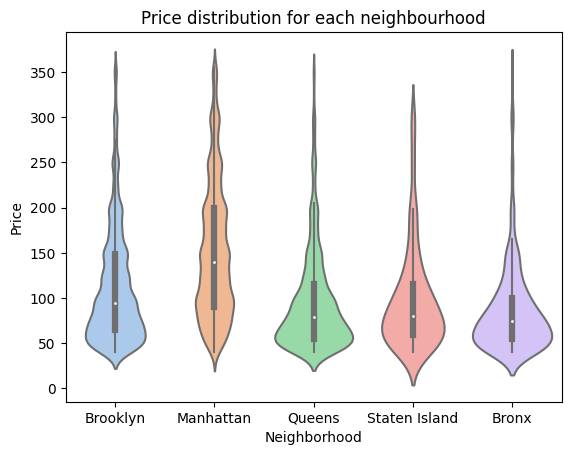

In [ ]:
ax2=sns.violinplot(data=df, x='neighbourhood_group', y='price',palette='pastel')
ax2.set(xlabel='Neighborhood', ylabel='Price', title='Price distribution for each neighbourhood')
plt.show()

By examining the data, it becomes evident that Manhattan stands out with a greater concentration of higher-priced properties. On the other hand, Bronx, Staten Island, and Queens exhibit more reasonable price ranges in comparison to Brooklyn and Manhattan. Additionally, it is notable that all neighborhood groups exhibit positive skewness in their price distributions. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

#### *let's explore the room types and check each of their market share*

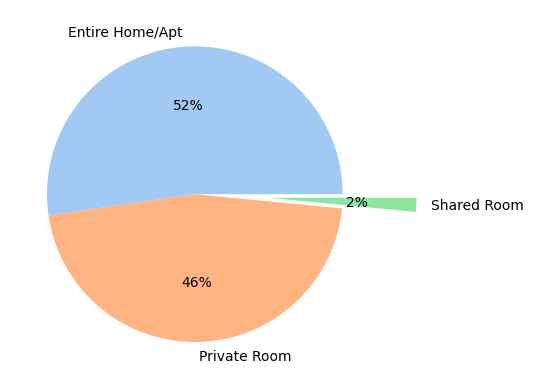

In [ ]:
k=['Entire Home/Apt','Private Room','Shared Room']
d=df['room_type'].value_counts()
e = [0, 0, 0.5]
palette_color = sns.color_palette('pastel')
plt.pie(d, labels=k, colors=palette_color,explode=e, autopct='%.0f%%')
plt.show()


We see that entire homes and private rooms are the most common, which may be because the demand for shared rooms is typically lower.

The preference for entire homes and private rooms can be explained by the desire for privacy and comfort that travelers often seek during their stay. Entire homes offer a complete living space, providing guests with the convenience and flexibility of having the place to themselves. Similarly, private rooms offer a sense of privacy while still allowing guests to interact with local hosts or other travelers, creating a more intimate and personalized experience.

On the other hand, the demand for shared rooms is typically lower in these neighborhoods. While shared rooms can be a more affordable option for budget-conscious travelers, they may not be as appealing to the wider market due to concerns about privacy and personal space. Which led travelers to find alternative options that better suit their preferences and needs.

####  *The prices distribution spreads of shared rooms, private rooms, and entire homes.*

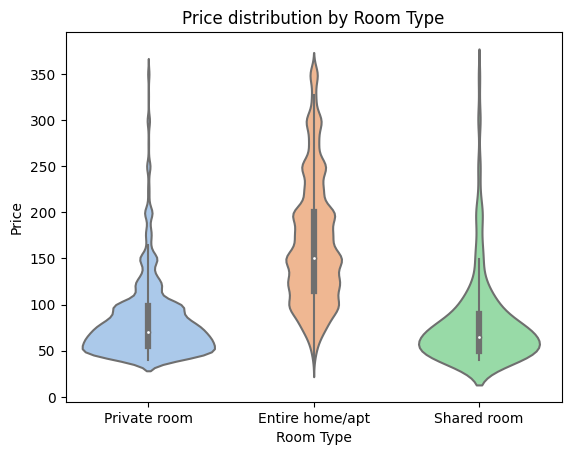

In [ ]:
ax4=sns.violinplot(data=df, x='room_type', y='price',palette='pastel')
ax4.set(xlabel='Room Type', ylabel='Price', title='Price distribution by Room Type')
plt.show()

As anticipated, the mean prices of shared rooms, private rooms, and entire homes exhibit distinct variations within the distribution of property prices. Shared rooms tend to have the lowest mean price, reflecting their affordability and cost-effectiveness. This is likely due to the shared nature of these accommodations, where multiple individuals occupy the same space, allowing for lower individual costs.

In contrast, entire homes have the highest mean price, indicating a higher level of luxury, exclusivity, and spaciousness. These properties typically offer a complete living space, providing guests with a sense of privacy and autonomy during their stay. The higher mean price for entire homes can be attributed to factors such as the larger size, additional amenities, and the overall comfort and convenience they offer.

When examining the spread of prices within each room type, it is observed that private rooms and shared rooms appear to be more centered around their mean prices. This suggests that there is relatively less variability in pricing within these categories, indicating a certain level of consistency in terms of what guests can expect to pay for these types of accommodations.

#### *Lets see onn an average for how many nights people stayed in each Room Types.*

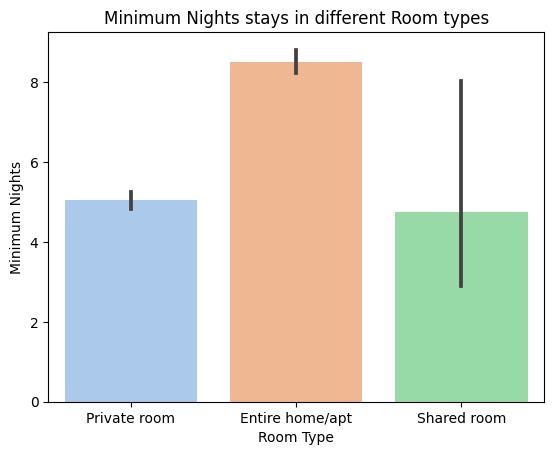

In [ ]:
ax5=sns.barplot(x=df['room_type'],y=df['minimum_nights'],palette='pastel')
ax5.set(xlabel='Room Type', ylabel='Minimum Nights', title='Minimum Nights stays in different Room types')
plt.show()


The data reveals a clear preference among guests for staying in entire homes or apartments on Airbnb, with an average duration of more than 8 nights. This suggests that individuals or groups seeking accommodation through Airbnb often prioritize longer-term stays and value the experience of having an entire living space to themselves.

The popularity of entire homes or apartments can be attributed to several factors. Firstly, these listings offer guests a higher level of privacy and comfort compared to other room types. Guests can enjoy the convenience of having their own living area, kitchen facilities, and bedrooms, providing a more homely and independent experience during their stay.

On the other hand, guests who opt for shared rooms tend to have an average stay duration of 6-7 nights. While shared rooms may not provide the same level of privacy as entire homes or apartments, they offer a more budget-friendly option for travelers. Shared rooms are often sought after by solo travelers or those looking to socialize and meet new people during their trip.

The shorter average stay duration for shared rooms can be attributed to the nature of communal living, where guests may be more inclined to choose this option for shorter stays or as a convenient and cost-effective solution for their accommodation needs.

#### *To locate the top 5 Neighbourhood with the most number of Airbnb listings.*

<Axes: title={'center': 'Top Five Neighborhoods as pre the number of listings'}, xlabel='Count', ylabel='Neighbourhood'>

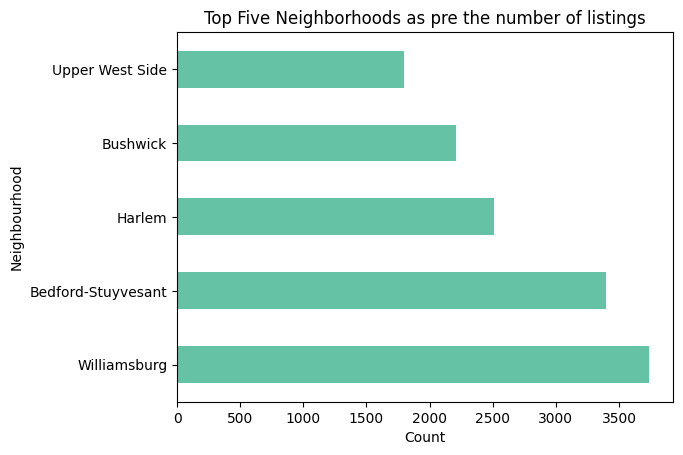

In [ ]:
ax6 = df.neighbourhood.value_counts().head(5)
ax6.plot(kind = 'barh', xlabel='Count',ylabel='Neighbourhood',title = 'Top Five Neighborhoods as pre the number of listings',colormap='Set2')

We can see that for these 5 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

#### *To see the trend in Room type in the Top 5 Neighbourhood with the most number of Airbnb listings.*

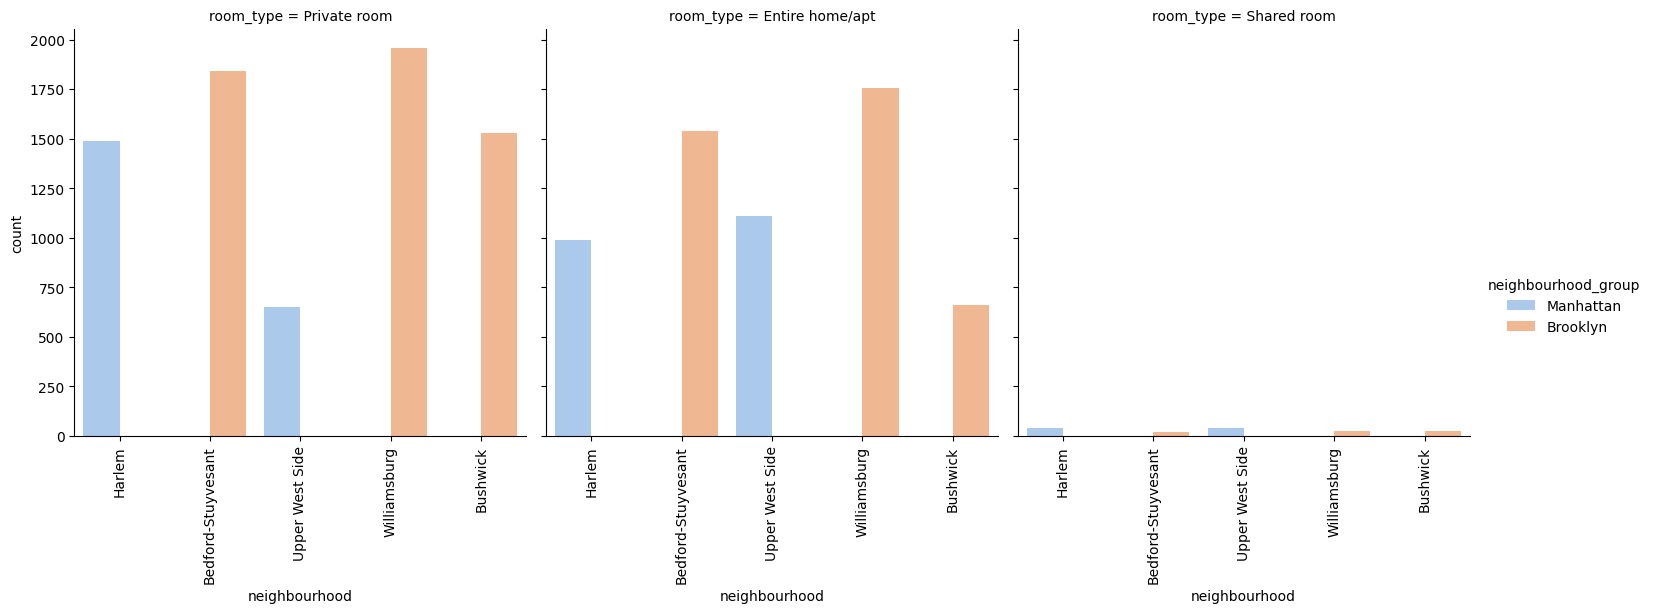

In [ ]:
tn=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side'])]
ax7=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=tn, kind='count',palette='pastel')
ax7.set_xticklabels(rotation=90)

The plot presented consists of three subplots, demonstrating the power of using the catplot function. This approach enables us to easily compare distributions among different attributes. Each subplot shares the same Y and X axes, where the Y-axis represents the count of observations and the X-axis represents the attribute being counted. However, two additional elements, namely column and hue, contribute to differentiating the subplots. By specifying the column and hue parameters, we can observe and compare the relationships between the Y and X axes within each column, as well as the color-coded distinctions.

From this analysis, several key observations can be made. Firstly, the most contrasting observation is that 'Shared room' type Airbnb listings are significantly less available compared to other types in the five most populated neighborhoods. This suggests that hosts in these neighborhoods prefer to offer entire homes or private rooms rather than shared spaces. The scarcity of shared rooms may reflect the preferences of both hosts and guests in these popular areas, where individuals often prioritize privacy and exclusive use of living spaces.

Furthermore, among the five most populated neighborhoods, only two boroughs, Manhattan and Brooklyn, are represented. This finding aligns with expectations, as Manhattan and Brooklyn are renowned destinations attracting a high number of travelers. The presence of listings from these two boroughs emphasizes their popularity and the abundance of available accommodations.

When examining the specific neighborhoods within each borough, we observe that Bedford-Stuyvesant and Williamsburg stand out as the most popular neighborhoods within Manhattan, while Harlem emerges as a favored neighborhood within Brooklyn. These findings shed light on the preferred locations within each borough, indicating that certain neighborhoods are particularly sought after by Airbnb guests. Factors such as proximity to attractions, transportation convenience, and the overall ambiance of these neighborhoods likely contribute to their popularity.

The insights gained from this plot provide valuable information for both hosts and potential guests on the Airbnb platform. Hosts can better understand the demand for different types of listings and adjust their offerings accordingly. Additionally, guests can utilize this information to identify the neighborhoods that align with their preferences and interests when searching for accommodations.

#### *To find the neighbourhoods or the neighbourhood groups where the owners are preffering longer stays rather than one shorter inn type stays.*

In [ ]:
#selecting only the top 100 Neighbourhoods with the highest number of listing, so that we can deal with the outliers.
c=df['neighbourhood'].value_counts(ascending=False).head(100)
minni=c.to_frame()
minni['index'] = minni.index
name=list(minni['index'])
min=df.loc[df['neighbourhood'].isin(name)]
min['neighbourhood'].value_counts(ascending=False)

Williamsburg          3738
Bedford-Stuyvesant    3397
Harlem                2512
Bushwick              2209
Upper West Side       1799
                      ... 
Glendale                46
St. George              45
Wakefield               42
Columbia St             41
Corona                  37
Name: neighbourhood, Length: 100, dtype: int64

In [ ]:
#Arranging the dataset as per the Number of Reviews of each listings so that we can get a accurate reading on the people's preference.
min=min.sort_values('number_of_reviews', ascending=False)

#setting the limit to the maximum number of Minimum Nights so that the prediction can be free from outliers.
min=min[min['minimum_nights']<=60]

<Axes: title={'center': 'Listings where owners are preffering longer stays rather than one shorter inn type stays'}, xlabel='Minimum Nights', ylabel='Neighbourhood'>

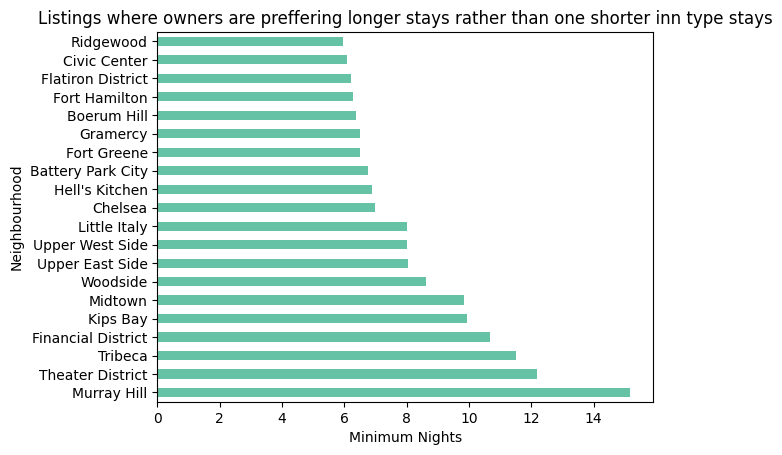

In [ ]:
ax8=min.groupby('neighbourhood')['minimum_nights'].mean()
ax8=ax8.sort_values(ascending=False).head(20)
ax8.plot(kind = 'barh', xlabel='Minimum Nights',ylabel='Neighbourhood',title = 'Listings where owners are preffering longer stays rather than one shorter inn type stays',colormap='Set2')

According to the analysis, Manhattan has the highest average number of nights stayed per booking, with an average value of 10.7 days. This finding indicates that guests who choose to stay in Manhattan through Airbnb tend to have longer durations for their accommodations. It suggests that Manhattan is a popular destination for visitors seeking an extended stay experience, whether for leisure or business purposes.

Furthermore, when examining specific neighborhoods, Murray Hills stands out with the maximum average minimum nights stay of over 14 days. This means that hosts in Murray Hills typically require guests to book for a minimum period of 7.5 days or more. This longer minimum nights stay requirement in Murray Hills suggests that hosts in this neighborhood are targeting guests who are interested in more prolonged stays, such as individuals relocating, attending long-term events, or seeking an immersive experience in the vibrant atmosphere of Murray Hills.

#### *Room Types and their relation with availability in different neighbourhood groups.*

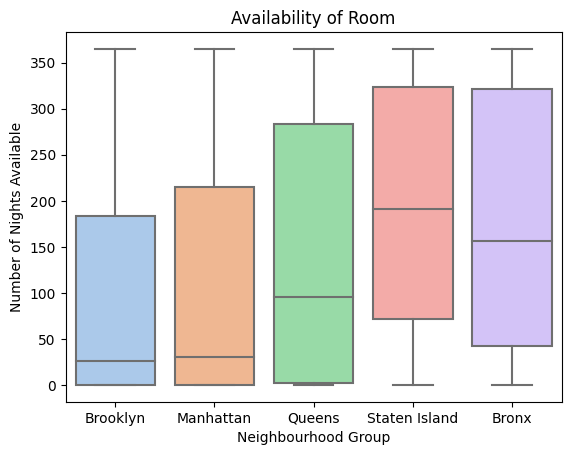

In [ ]:
ax9 = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='pastel')
ax9.set(xlabel='Neighbourhood Group', ylabel='Number of Nights Available', title='Availability of Room')
plt.show()

It appears that the categorical box plot suggests varying availability of listings in different boroughs of New York City. Staten Island seems to have the highest availability throughout the year, with listings being available for more than 300 days on average. On the other hand, Bronx has an average availability of around 150 days per year. Brooklyn and Manhattan, however, seem to have lower availability compared to the other boroughs.

#### *To check wow monthly reviews varies with room types in each neighbourhood groups.*

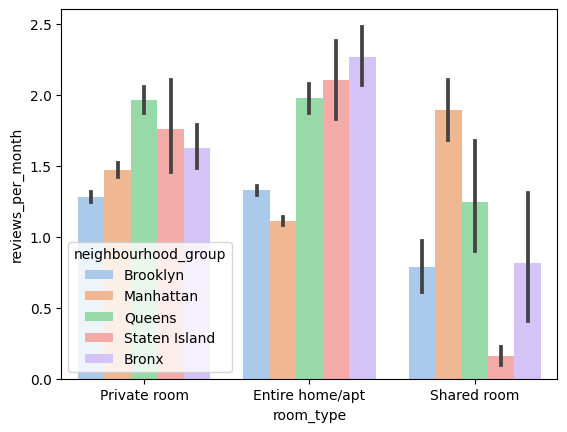

In [ ]:
ax10=sns.barplot(x=df['room_type'],y=df['reviews_per_month'],hue=df['neighbourhood_group'],palette='pastel')
ax9.set(xlabel='Room Type', ylabel='Reviews per Month', title='Most reviewed Room Type in each Neighbourhood Group')
plt.show()

Firstly, private rooms seem to receive the highest number of reviews per month. Among the boroughs, Queens had the highest number of reviews received for private rooms, indicating that it is a popular choice for travelers seeking this type of accommodation. Following Queens, Staten Island also received a significant number of reviews for private rooms, suggesting its appeal to Airbnb guests.

When considering entire home/apartment listings, both Staten Island and Bronx received the most reviews. This indicates that these boroughs have a higher concentration of entire home/apartment listings compared to other room types. The reasons for this could include a higher proportion of vacation rentals, investment properties, or a preference for entire homes/apartments in these areas.

In contrast, shared rooms received fewer reviews compared to other room types. However, it is worth noting that Manhattan and Queens received the highest number of reviews for shared rooms.

## **5. Key Findigs from the above Analysis.**

The analysis of the Airbnb dataset reveals interesting insights into the availability and popularity of different types of listings across New York City neighborhoods. Here are some key findings:

1. Neighborhoods like Manhattan and Brooklyn have the highest number of listings, which can be attributed to their numerous tourist attractions and high demand for accommodations.
2. Private rooms and entire homes are the most common listing types, indicating a preference for privacy and comfort among travelers.
3. Shared rooms have lower demand, likely due to concerns about privacy and personal space.
4. Manhattan has a higher concentration of higher-priced properties, while Bronx, Staten Island, and Queens offer more reasonable price ranges.
5. Guests prefer longer stays in entire homes and apartments, while shared rooms are more popular for shorter durations.
6. Specific neighborhoods like Bedford-Stuyvesant, Williamsburg (in Manhattan), and Harlem (in Brooklyn) stand out as popular choices for Airbnb guests.
7. The availability of listings varies across boroughs, with Staten Island having the highest availability throughout the year and Brooklyn and Manhattan having lower availability compared to other boroughs.
8. Private rooms receive the highest number of monthly reviews, with Queens being the most popular borough for this type of accommodation. Staten Island also receives a significant number of reviews for private rooms, indicating its appeal to Airbnb guests. Staten Island and the Bronx have the most reviews for entire home/apartment listings, suggesting a higher concentration of such listings in these boroughs. Shared rooms receive fewer reviews overall, but Manhattan and Queens have the highest number of reviews for this type of accommodation.

These insights can be valuable for both hosts and guests on the Airbnb platform. Hosts can tailor their offerings based on demand and preferences, while guests can choose neighborhoods and listing types that align with their needs and preferences.Answer Here.

# **Conclusion :**

The availability and popularity of different types of Airbnb listings vary across the neighborhoods of New York City. Neighborhoods like Manhattan and Brooklyn have the highest number of listings due to their popular tourist attractions. Private rooms and entire homes are the most common listing types, preferred for privacy and comfort. Shared rooms have lower demand. Manhattan has higher-priced properties, while Bronx, Staten Island, and Queens offer more reasonable prices. Guests prefer longer stays in entire homes and apartments, while shared rooms are popular for shorter durations. Specific neighborhoods like Bedford-Stuyvesant, Williamsburg, and Harlem stand out as popular choices. Availability varies across boroughs, with Staten Island having the highest availability. These insights are valuable for hosts and guests in optimizing their choices on the Airbnb platform.